In [1]:
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sys.path.insert(0, os.path.abspath(".."))
import lib_py.eda as eda
import lib_py.dwh as dwh

## Datenaufbereitung

### Speichern aller unique Wörter in einer Textdatei, die durch den regulären Ausdruck gefunden wurden

In [2]:
df = eda.get_unique_filter_words()
with open('unique_words.txt', 'a') as f:
    dfAsString = df.to_string(header=False, index=False)
    f.write(dfAsString)

### Herausfiltern einiger Wörter und erneutes speichern aller unique Wörter in einer Textdatei, die durch den regulären Ausdruck gefunden wurden

In [3]:
false_positives_list = ['schneesport', 'börsesport', 'financegaming', 'pferdesport', 'medaillesport', 'abonnierenxboxplaystatione', 'abonnierenxbox',
             'rtx', '(gv-n', 'kommentieren', 'livesport', 'mediadigitale-sportwissengesundheitkochen', 'e-sportwagen', 'klassesportler', 'sporthalle', 
             'hippie-sport','rallye-sport', 'leute-sport', 'ausnahmesportler', 'sportvorstand', 'technologiesport', 'imagesport', 'hundesport', 
             'peoplesport', 'wendesport', 'niederlagesport', 'anzeigesport', 'liebesport', 'zombiesport']
eda.delete_filter_words(false_positives_list)

df = eda.get_unique_filter_words()

if os.path.exists('unique_words.txt'):
  os.remove('unique_words.txt')

with open('unique_words.txt', 'a') as f:
    dfAsString = df.to_string(header=False, index=False)
    f.write(dfAsString)

DELETE FROM count_filter WHERE word LIKE '%schneesport%' OR word LIKE '%börsesport%' OR word LIKE '%financegaming%' OR word LIKE '%pferdesport%' OR word LIKE '%medaillesport%' OR word LIKE '%abonnierenxboxplaystatione%' OR word LIKE '%abonnierenxbox%' OR word LIKE '%rtx%' OR word LIKE '%(gv-n%' OR word LIKE '%kommentieren%' OR word LIKE '%livesport%' OR word LIKE '%mediadigitale-sportwissengesundheitkochen%' OR word LIKE '%e-sportwagen%' OR word LIKE '%klassesportler%' OR word LIKE '%sporthalle%' OR word LIKE '%hippie-sport%' OR word LIKE '%rallye-sport%' OR word LIKE '%leute-sport%' OR word LIKE '%ausnahmesportler%' OR word LIKE '%sportvorstand%' OR word LIKE '%technologiesport%' OR word LIKE '%imagesport%' OR word LIKE '%hundesport%' OR word LIKE '%peoplesport%' OR word LIKE '%wendesport%' OR word LIKE '%niederlagesport%' OR word LIKE '%anzeigesport%' OR word LIKE '%liebesport%' OR word LIKE '%zombiesport%'
DELETE FROM count_word_pair WHERE filter_word LIKE '%schneesport%' OR filter_

### Zusammenfassen der unterschiedlichen Schreibweisen der Filter words und Games zu einer Schreibweise

In [4]:
e_sports_schreibweisen = ['esport', 'e-sport', 'esports', 'e-sports']
eda.update_filter_words('e-sport', e_sports_schreibweisen)
gaming_schreibweisen = ['gaming', 'egaming', 'e-gaming']
eda.update_filter_words('gaming', gaming_schreibweisen)

csgo_schreibweisen = ['Counter-Strike', 'CSGO', 'CS:GO']
eda.update_games('CS:GO', csgo_schreibweisen)
cs2_schreibweisen = ['Counter-Strike-2', 'CS2', 'CS:2']
eda.update_games('CS2', cs2_schreibweisen)
pubg_schreibweisen = ['PUBG', 'PlayerUnknown']
eda.update_games('PUBG', pubg_schreibweisen)

UPDATE count_filter SET word = 'e-sport' WHERE word LIKE '%esport%' OR word LIKE '%e-sport%' OR word LIKE '%esports%' OR word LIKE '%e-sports%'
UPDATE count_word_pair SET filter_word = 'e-sport' WHERE filter_word LIKE '%esport%' OR filter_word LIKE '%e-sport%' OR filter_word LIKE '%esports%' OR filter_word LIKE '%e-sports%'
UPDATE word_with_prev_and_next_ten SET word = 'e-sport' WHERE word LIKE '%esport%' OR word LIKE '%e-sport%' OR word LIKE '%esports%' OR word LIKE '%e-sports%'
UPDATE count_filter SET word = 'gaming' WHERE word LIKE '%gaming%' OR word LIKE '%egaming%' OR word LIKE '%e-gaming%'
UPDATE count_word_pair SET filter_word = 'gaming' WHERE filter_word LIKE '%gaming%' OR filter_word LIKE '%egaming%' OR filter_word LIKE '%e-gaming%'
UPDATE word_with_prev_and_next_ten SET word = 'gaming' WHERE word LIKE '%gaming%' OR word LIKE '%egaming%' OR word LIKE '%e-gaming%'
UPDATE count_games SET game = 'CS:GO' WHERE game LIKE '%Counter-Strike%' OR game LIKE '%CSGO%' OR game LIKE '%CS:GO

### Erneute Überprüfung auf unique Wörter

In [5]:
df = eda.get_unique_filter_words()

if os.path.exists('unique_words.txt'):
  os.remove('unique_words.txt')

with open('unique_words.txt', 'a') as f:
    dfAsString = df.to_string(header=False, index=False)
    f.write(dfAsString)

with open('unique_words.txt', 'r') as f:
    content = f.read()
    print(content)

e-sport
 gaming


### Hinzufügen der DIM_Event zum DWH

In [6]:
dwh.create_dim_event()
dwh.fill_dim_event()

## Ergebnisanalyse

### Reading Data from DWH

In [7]:
df_events = eda.get_events()
df_filterwords_count_total_by_day = eda.get_filterwords_count_total_by_day()
df_filterwords_count_total_by_month = eda.get_filterwords_count_total_by_month()
df_filterwords_count_total_by_paper = eda.get_filterwords_count_total_by_paper()
df_filterwords_count_total_by_paper_group = eda.get_filterwords_count_total_by_paper_group()
df_filterwords_count_total_by_paper_group_and_month = eda.get_filterwords_count_total_by_paper_group_and_month()
df_games_count_total = eda.get_games_count_total()
df_games_count_total_by_month = eda.get_games_count_total_by_month()
df_games_count_by_paper = eda.get_games_count_by_paper()
df_games_count_by_paper_group = eda.get_games_count_by_paper_group()
df_games_count_by_paper_group_and_month = eda.get_games_count_by_paper_group_and_month()

### E-Sports & Gaming nach Zeitungen

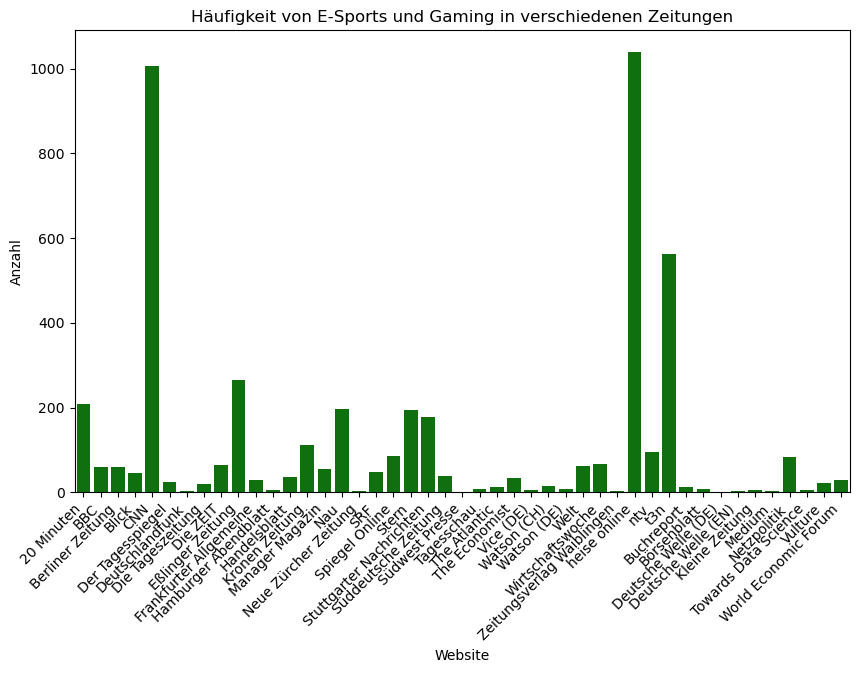

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_filterwords_count_total_by_paper, x='Paper', y='Count', color='green', errorbar=None)
plt.title('Häufigkeit von E-Sports und Gaming in verschiedenen Zeitungen')
plt.xlabel('Website')
plt.ylabel('Anzahl')
plt.xticks(rotation=45, ha='right')
plt.show()

### E-Sports & Gaming nach Zeitungsgruppen

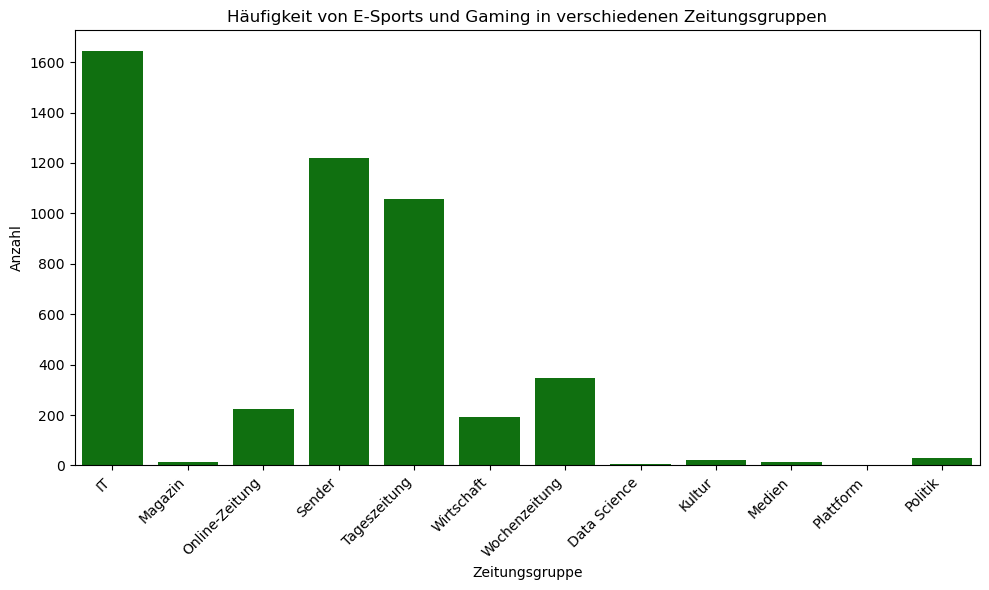

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_filterwords_count_total_by_paper_group, x='Gruppe', y='Count', color='green', errorbar=None)
plt.title('Häufigkeit von E-Sports und Gaming in verschiedenen Zeitungsgruppen')
plt.xlabel('Zeitungsgruppe')
plt.ylabel('Anzahl')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### E-Sports & Gaming nach Monaten

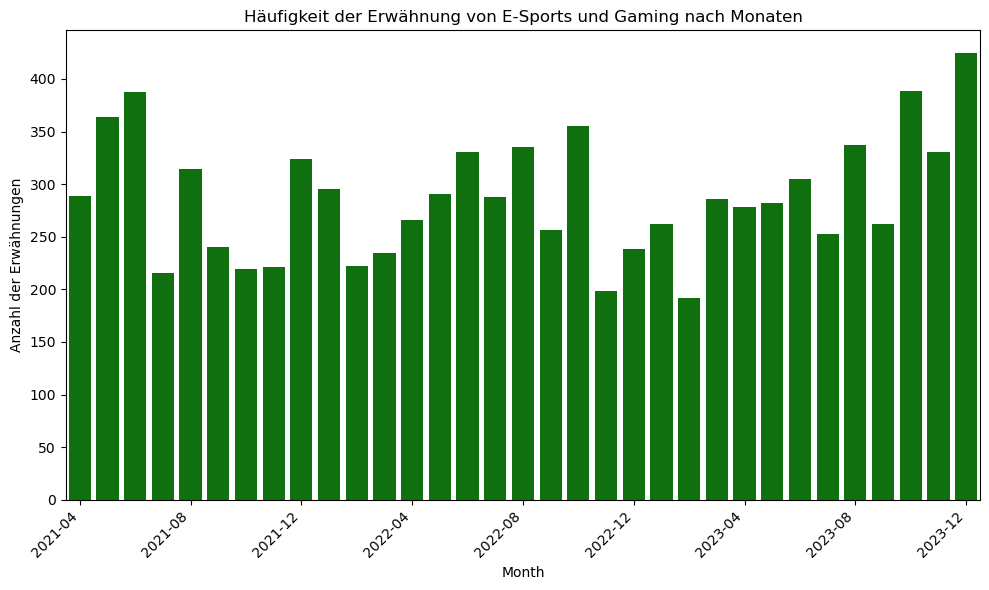

In [10]:
df_plot = df_filterwords_count_total_by_month.groupby('Month').sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_plot, x=df_plot['Month'], y='Count', color='green', errorbar=None)
plt.title('Häufigkeit der Erwähnung von E-Sports und Gaming nach Monaten')
plt.xlabel('Month')
plt.ylabel('Anzahl der Erwähnungen')
plt.xticks(rotation=45, ha='right')
plt.xticks(np.arange(0, len(df_plot), step=4))

plt.tight_layout()
plt.show()

### Events nach Monaten

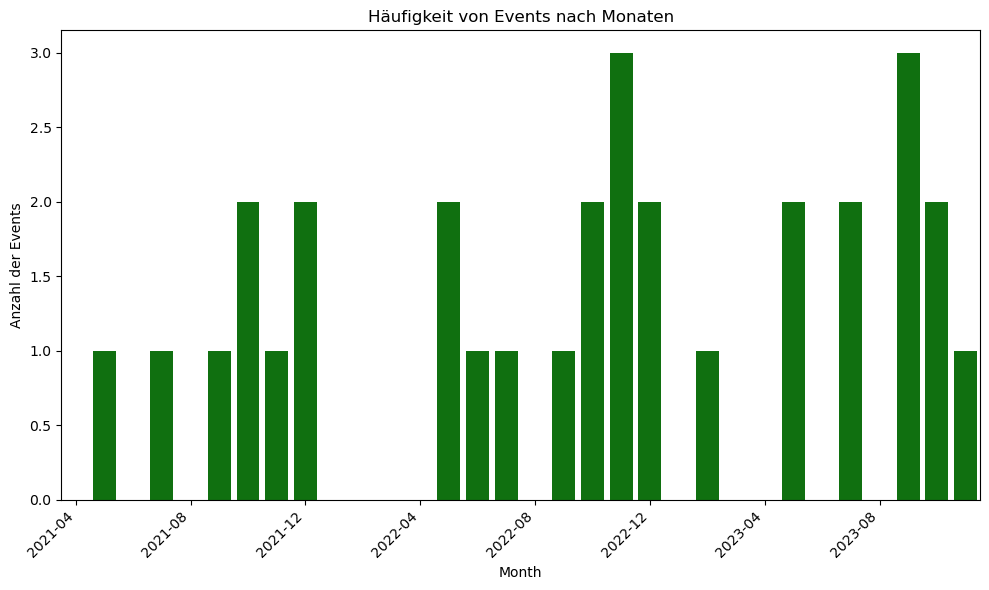

In [11]:
min_month = df_filterwords_count_total_by_month['Month'].min()
max_month = df_filterwords_count_total_by_month['Month'].max()
alle_monate = pd.date_range(start=min_month, end=max_month, freq='M').strftime('%Y-%m')

df_events_count_by_month = df_events.groupby(df_events['Month']).size().reset_index(name='Count')
df_events_count_by_month = df_events_count_by_month.set_index('Month').reindex(alle_monate, fill_value=0).reset_index()
df_events_count_by_month = df_events_count_by_month.rename(columns={'index': 'Month'})

plt.figure(figsize=(10, 6))
sns.barplot(data=df_events_count_by_month, x='Month', y='Count', color='green', errorbar=None)
plt.title('Häufigkeit von Events nach Monaten')
plt.xlabel('Month')
plt.ylabel('Anzahl der Events')
plt.xticks(rotation=45, ha='right')
plt.xticks(np.arange(0, len(df_events_count_by_month), step=4))
plt.tight_layout()
plt.show()

### Games allgemein

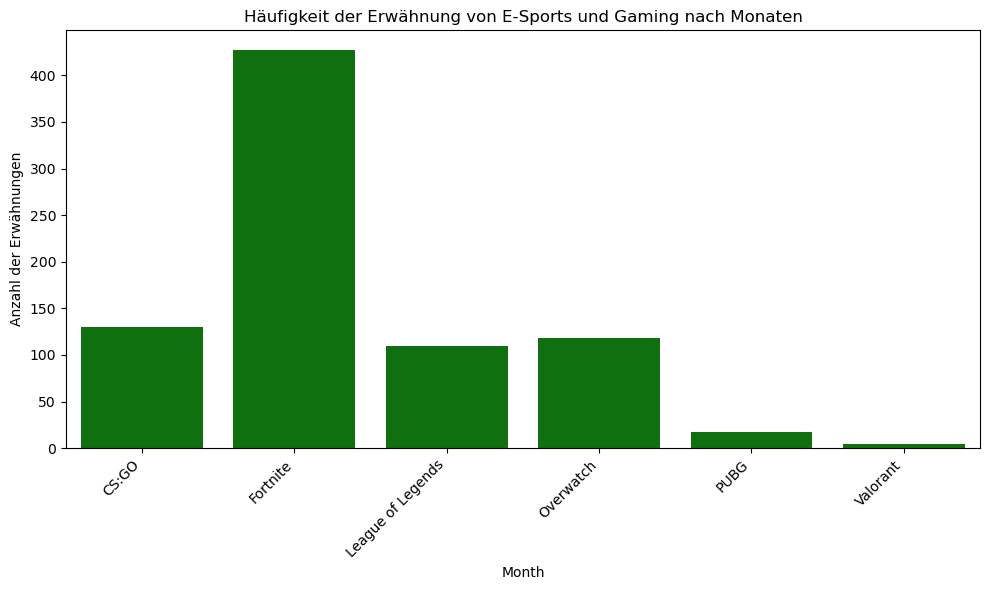

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_games_count_total, x='Game', y='Count', color='green', errorbar=None)
plt.title('Häufigkeit der Erwähnung von E-Sports und Gaming nach Monaten')
plt.xlabel('Month')
plt.ylabel('Anzahl der Erwähnungen')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Games insgesamt nach Zeitungen

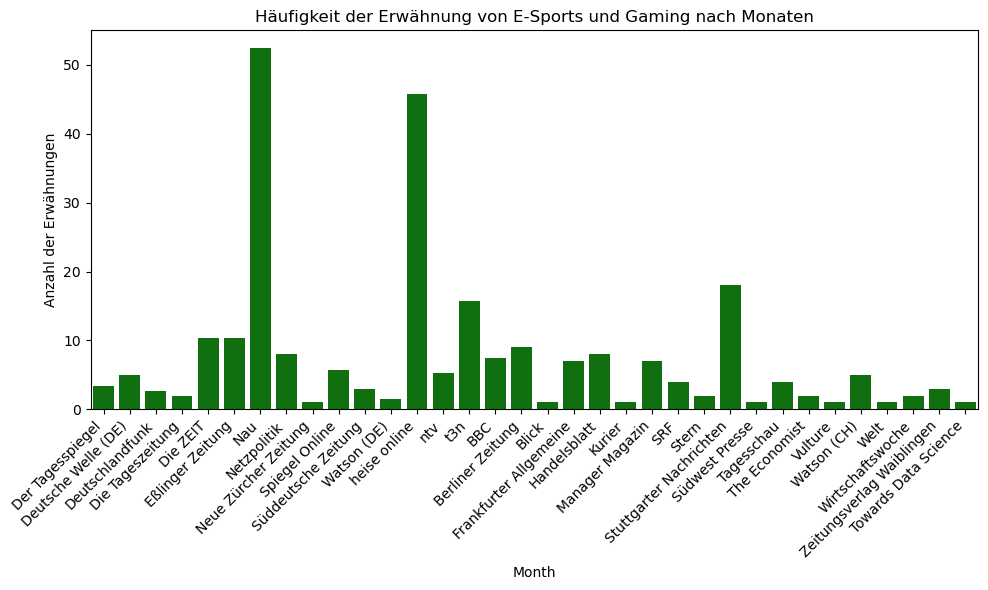

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_games_count_by_paper, x='Paper', y='Count', color='green', errorbar=None)
plt.title('Häufigkeit der Erwähnung von E-Sports und Gaming nach Monaten')
plt.xlabel('Month')
plt.ylabel('Anzahl der Erwähnungen')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Games insgesamt nach Zeitungsgruppen

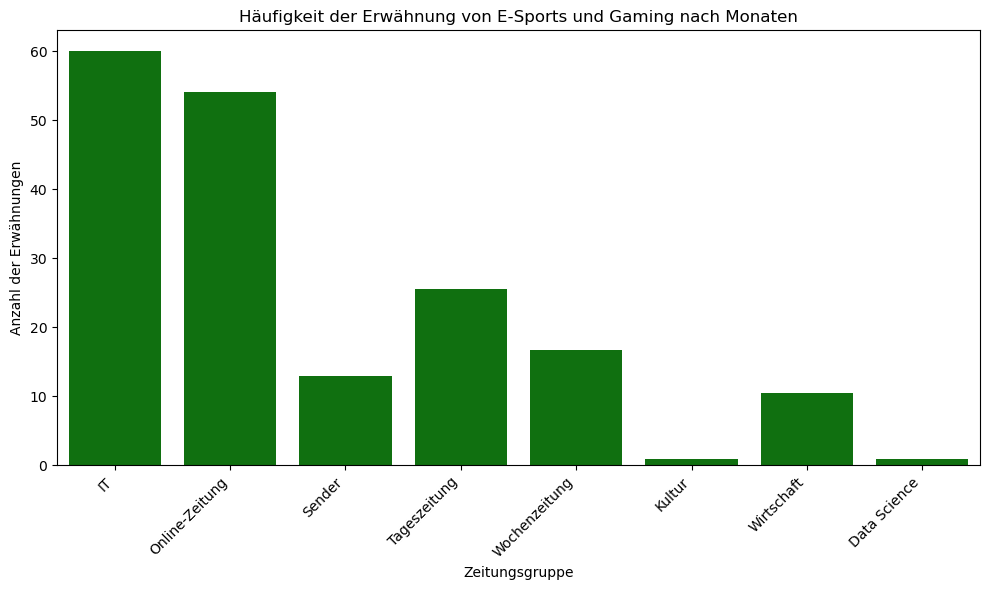

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_games_count_by_paper_group, x='Gruppe', y='Count', color='green', errorbar=None)
plt.title('Häufigkeit der Erwähnung von E-Sports und Gaming nach Monaten')
plt.xlabel('Zeitungsgruppe')
plt.ylabel('Anzahl der Erwähnungen')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Games speziell nach Zeitungen

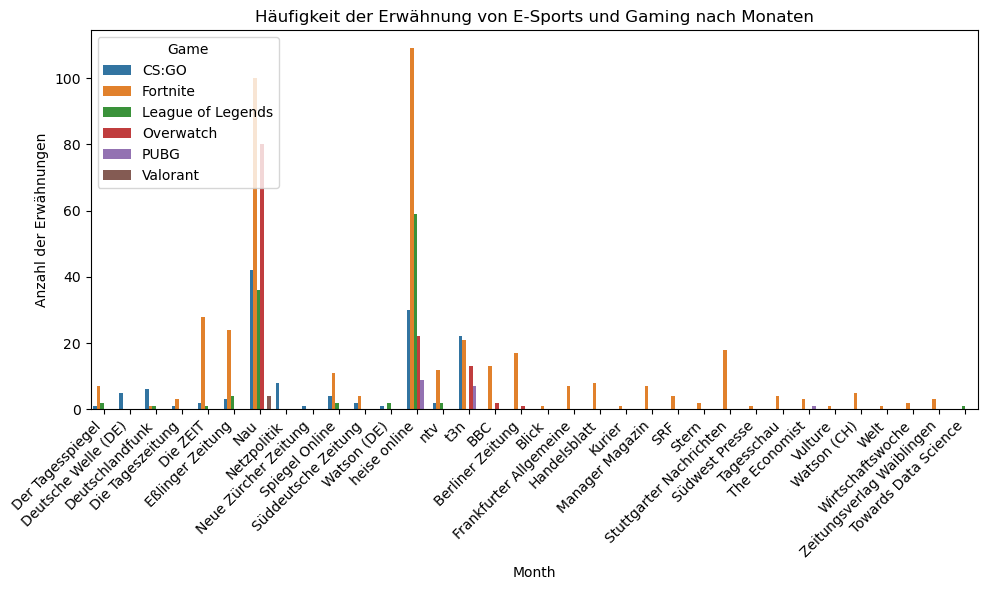

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_games_count_by_paper, x='Paper', y='Count', hue='Game', errorbar=None)
plt.title('Häufigkeit der Erwähnung von E-Sports und Gaming nach Monaten')
plt.xlabel('Month')
plt.ylabel('Anzahl der Erwähnungen')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Games speziell nach Zeitungsgruppen

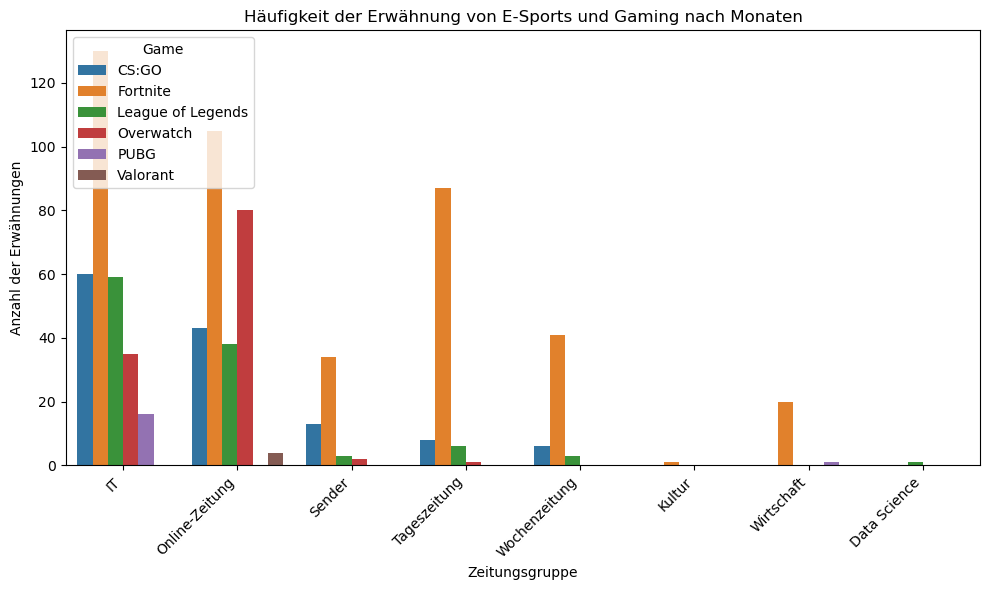

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_games_count_by_paper_group, x='Gruppe', y='Count', hue='Game', errorbar=None)
plt.title('Häufigkeit der Erwähnung von E-Sports und Gaming nach Monaten')
plt.xlabel('Zeitungsgruppe')
plt.ylabel('Anzahl der Erwähnungen')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Games nach Monaten + Events

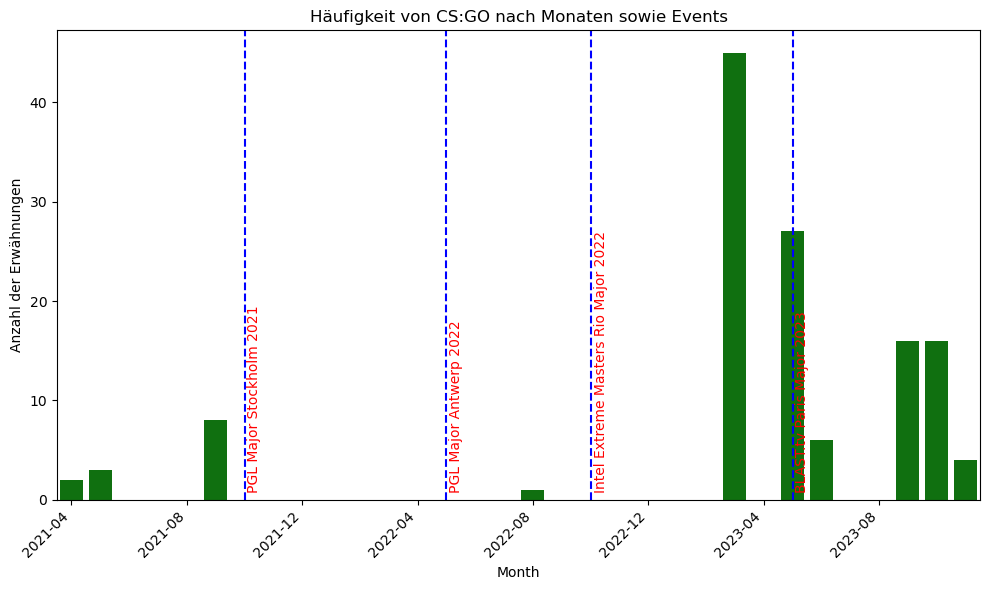

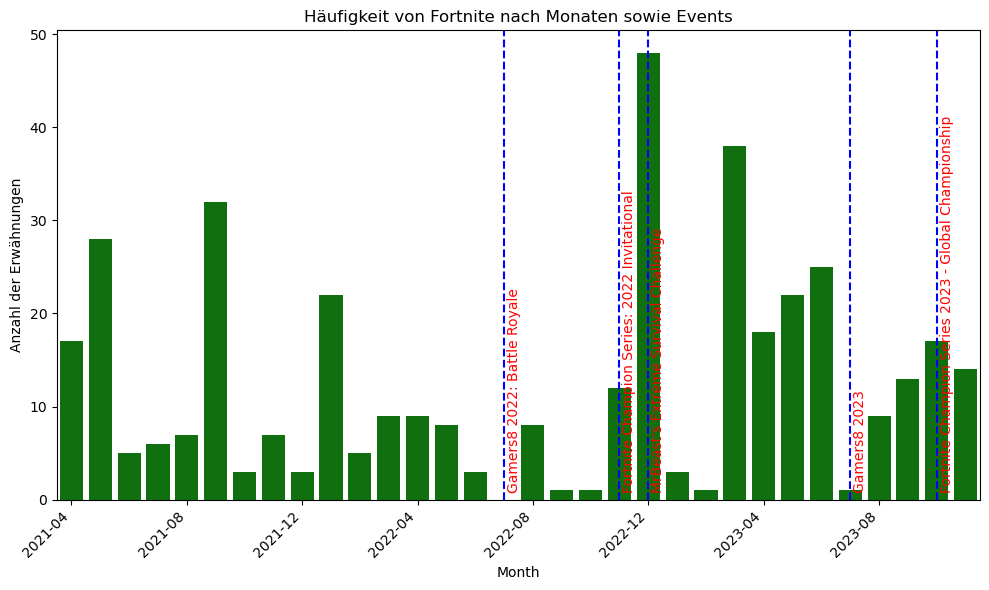

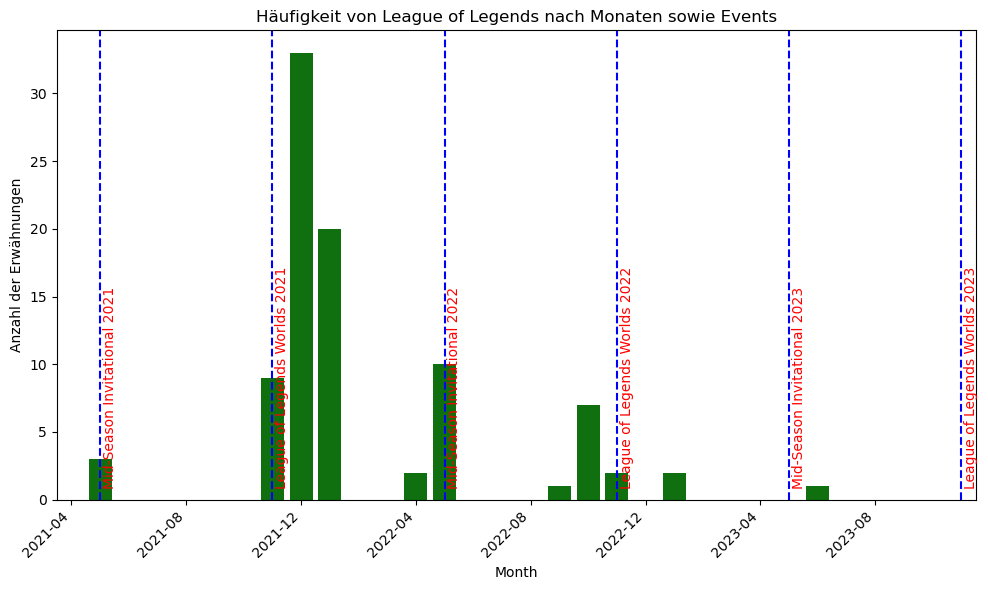

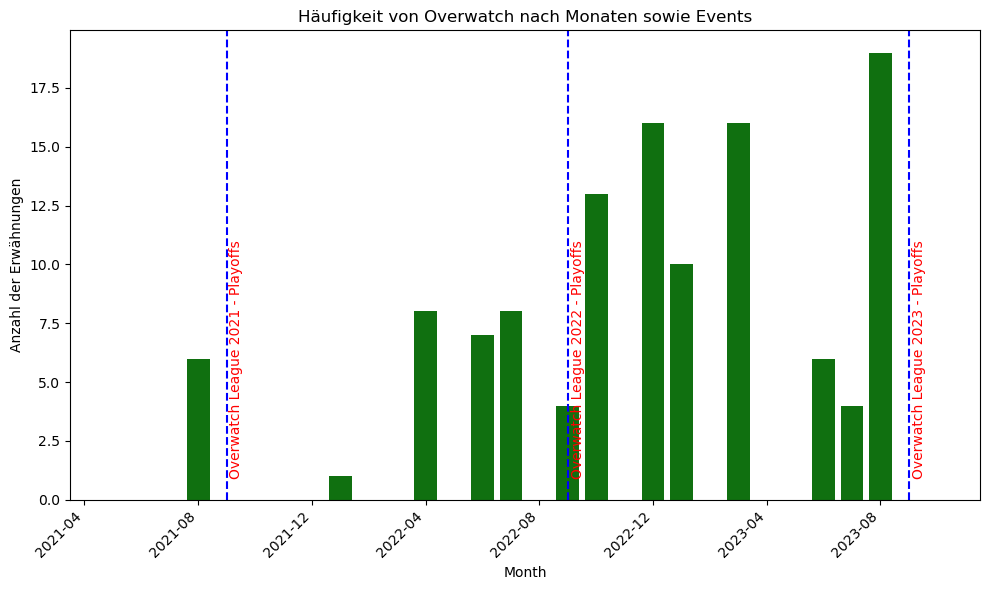

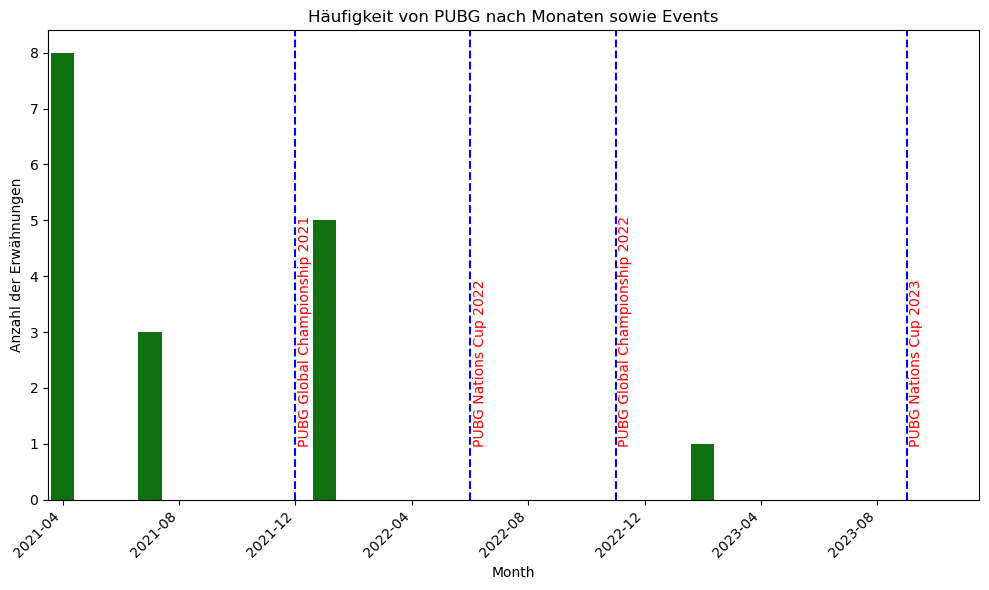

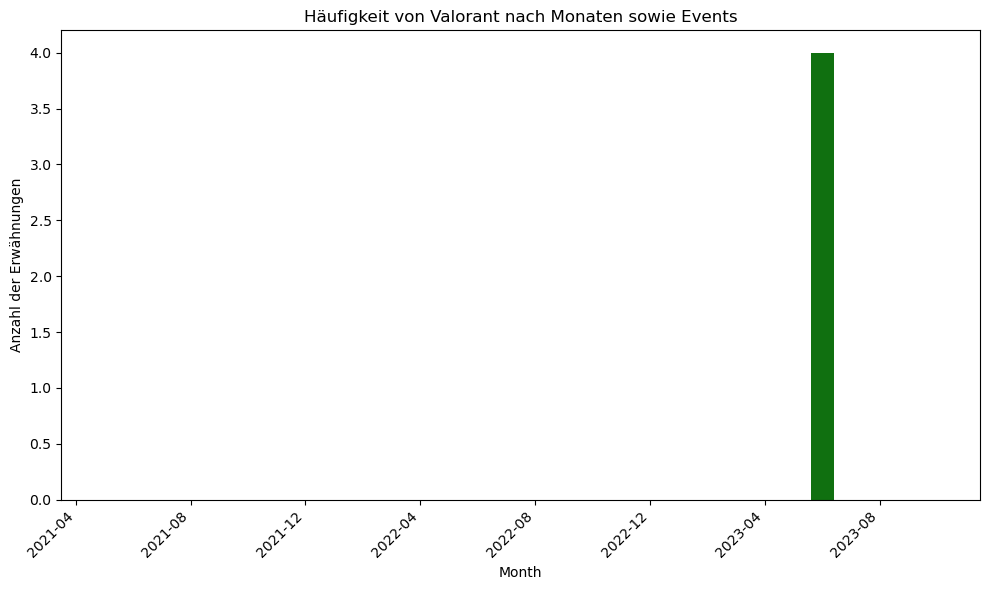

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

df_games_count_total_by_month_plot = df_games_count_total_by_month
df_games_count_total_by_month_plot['Month'] = pd.to_datetime(df_games_count_total_by_month_plot['Month'])
df_events_plot = df_events
df_events_plot['Month'] = pd.to_datetime(df_events_plot['Month'])

min_month = df_filterwords_count_total_by_month['Month'].min()
max_month = df_filterwords_count_total_by_month['Month'].max()
alle_monate = pd.date_range(start=min_month, end=max_month, freq='M').strftime('%Y-%m')

for game in df_games_count_total["Game"].unique():
    df_events_game = df_events_plot[df_events_plot['Game'] == game]
    df_games_count_total_by_month_game = df_games_count_total_by_month_plot[df_games_count_total_by_month_plot['Game'] == game]

    df_games_count_total_by_month_game = df_games_count_total_by_month_game.set_index('Month')
    df_games_count_total_by_month_game = df_games_count_total_by_month_game.reindex(alle_monate, fill_value=0).reset_index()
    df_games_count_total_by_month_game = df_games_count_total_by_month_game.rename(columns={'index': 'Month'})

    plt.figure(figsize=(10, 6))
    
    ax = sns.barplot(data=df_games_count_total_by_month_game, x='Month', y='Count', color='green')

    for index, row in df_events_game.iterrows():
        month = row['Month']
        x_position = df_games_count_total_by_month_game[df_games_count_total_by_month_game['Month'] == month.strftime("%Y-%m")]
        if len(x_position) > 0:
            x_position = x_position.index[0]
            ax.axvline(x=x_position, color='blue', linestyle='--')
            ax.text(x_position + 0.1, 1, row['Event'], color='red', rotation=90, ha='left')

    plt.title(f'Häufigkeit von {game} nach Monaten sowie Events')
    plt.xlabel('Month')
    plt.ylabel('Anzahl der Erwähnungen')
    plt.xticks(rotation=45, ha='right')
    plt.xticks(np.arange(0, len(df_events_count_by_month), step=4))
    plt.tight_layout()

plt.show()

### Word-Pairs

In [18]:
df_filterwords_word_pair_count_total = eda.get_filterwords_word_pair_count_total()
df_filterwords_word_pair_count_total

,filter_word,other_word,Count
0,e-sport,digital,2016
1,e-sport,tv,1991
2,e-sport,aheadupstartswork,1490
3,e-sport,citiesstyleartsdesignfashionarchitectureluxury...,1490
4,e-sport,filmshlntv,1490
...,...,...,...
20011,gaming,„zurück,1
20012,gaming,•video,1
20013,gaming,…\t\t\t\t,1
20014,gaming,€intelgigabyte,1
